### Import Packages and Functions

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

c:\Users\Robby\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Robby\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Robby\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


2.13.0


In [2]:
pd.set_option('display.max_colwidth', None )
pd.set_option('display.max_rows', None)

### Load and Explore Data

In [3]:
# Load data
train_df = pd.read_csv(r"C:\Users\Robby\Downloads\Toxic Comment Classification\train.csv")

In [4]:
train_df.head(5)

,comment_text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


In [5]:
train_df.fillna(' ', inplace= True)

# <left><span style="Bold; font-size:18px; color:#FF5733;">TEXT CLEANSING</span></left>

In [6]:
import re
import string

In [7]:
def clean_punctuation(text):
    text = str(text)
    # Case folding
    text = text.lower()
    # Menghapus spasi berlebih
    text = ' '.join(text.split())
    # substitusi kata
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    # Menghapus karakter khusus, tanda baca
    text = re.sub(r'[-.,+"&\'#@;:{}`+=~/!?()]', '', text)\
    # memastikan tanda baca terhapus
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    # menghapus kata yang diapit oleh karakter s
    text = re.sub('S*dS*s*','', text)           

    
    return text

In [8]:
train_df['comment_text'] = train_df['comment_text'].apply(clean_punctuation)

# <left><span style="Bold; font-size:18px; color:#FF5733;">EKSTRAKSI TEKS KOMENTAR</span></left>

In [9]:
train_df.shape

(159571, 2)

In [10]:
# Ekstraksi Teks Komentar

x = train_df['comment_text'].values
print(x)

['explanation why the eits mae une my usename hacoe metallica fan wee evete they wee not vanalisms just closue on some gas afte i vote at new yok olls fac an please o not emove the template fom the talk page since i am etie now892053827'
 'aww he matches this backgoun colou i am seemingly stuck with thanks talk 2151 januay 11 2016 utc'
 'hey man i am eally not tying to eit wa it is just that this guy is constantly emoving elevant infomation an talking to me though eits instea of my talk page he seems to cae moe about the fomatting than the actual info'
 ... 'spitze umm thees no actual aticle fo postitution ing  cunch captain'
 'an it looks like it was actually you who put on the speey to have the fist vesion elete now that i look at it'
 ' an  i eally o not think you unestan i came hee an my iea was ba ight away what kin of community goes you have ba ieas go away instea of helping ewite them ']


# <left><span style="Bold; font-size:18px; color:#FF5733;">VISUALISASI WORD CLOUD</span></left>

In [11]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

comments = train_df['comment_text'].loc[train_df['toxic'] == 1].values

wordcloud = WordCloud(
    width=640,
    height=640,
    background_color='black',
    stopwords=STOPWORDS
).generate(str(comments))

In [12]:
# Mengambil kata-kata dari word cloud dengan frekuensi
word_freq = wordcloud.process_text(str(comments))

# Membuat DataFrame untuk kata-kata dan frekuensinya
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=["Kata", "Frekuensi"])

# Mengurutkan DataFrame berdasarkan frekuensi (dari yang tertinggi ke terendah)
word_freq_df = word_freq_df.sort_values(by="Frekuensi", ascending=False)

# Menampilkan daftar kata-kata beserta frekuensinya
print(word_freq_df)

                 Kata  Frekuensi
32                  o         11
55               stop          5
66              elete          5
47                eit          4
65                eve          3
73                ass          3
50           bullshit          3
60               will          2
24                ask          2
71            confime          2
72              stupi          2
39               absu          2
20               thei          2
83               wong          2
82               shit          2
80               othe          2
75             please          2
70               oste          2
68                wwe          2
90                 go          2
96                  u          2
49            fucking          2
9                  wp          2
1               befoe          2
5                 hey          2
69               2k15          1
77                 2k          1
67             annoye          1
64             listen          1
63   usefa

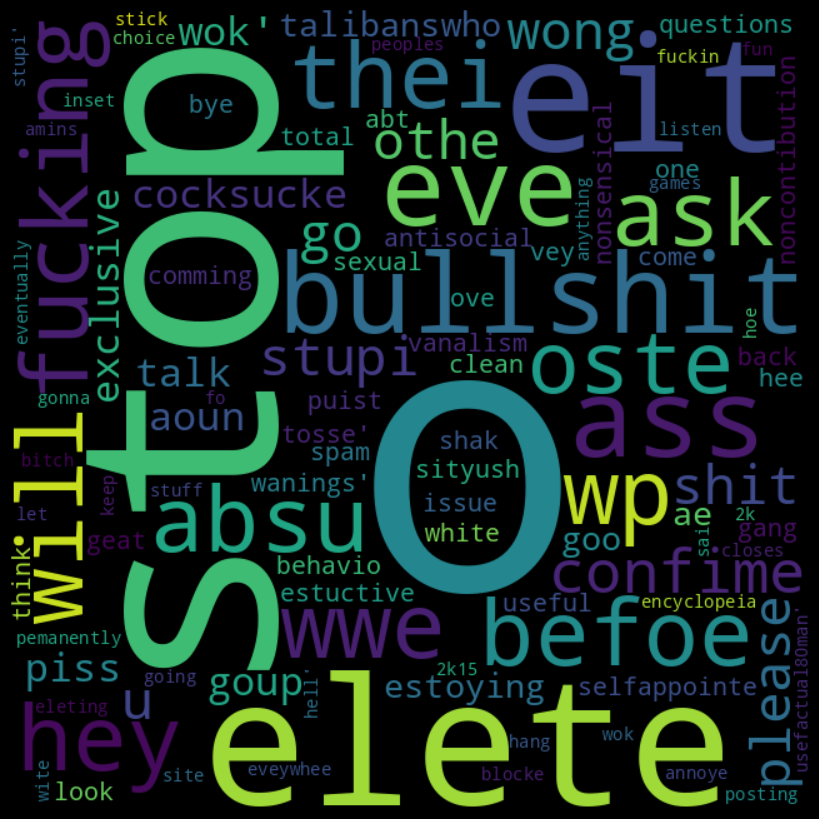

In [13]:
#Membuat visualisasi 'word cloud' untuk melihat kata-kata yang paling sering muncul dalam dataset.
#Filter kata-kata beracun yang sering muncul."
#Visualisasi memberikan gambaran kata-kata beracun yang dominan dalam dataset."

import matplotlib.pyplot as plt
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# <left><span style="Bold; font-size:18px; color:#FF5733;">EKSTRAKSI LABEL KELAS</span></left>

In [14]:
y = train_df['toxic'].values

# <left><span style="Bold; font-size:18px; color:#FF5733;">VISUALISASI DISTRIBUSI KELAS</span></left>

<Axes: title={'center': 'Distribution of Toxic Comments'}, ylabel='Frequency'>

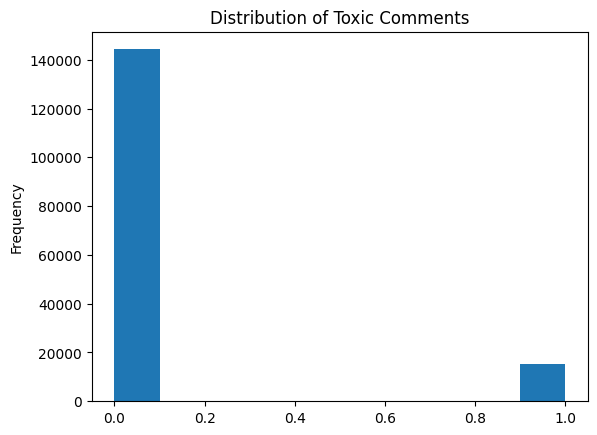

In [15]:
# Plot frequency of toxic comments
train_df['toxic'].plot(kind='hist', title='Distribution of Toxic Comments')

# <left><span style="Bold; font-size:18px; color:#FF5733;">Tokenize and Pad Text Data</span></left>

In [16]:
max_features = 20000 # hanya mengambil 20000 kata yang paling sering muncul
max_text_length = 400 # panjang maksimum dari teks yang akan diolah 

In [17]:
x_tokenizer = text.Tokenizer(max_features) # membuat tokenizer
x_tokenizer.fit_on_texts(list(x)) # mengkonversi teks ke dalam urutan token

In [18]:
x_tokenized = x_tokenizer.texts_to_sequences(x) # mengkonversi teks ke dalam urutan token

In [19]:
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length) # membuat sequence dengan panjang maksimum 400

# <left><span style="Bold; font-size:18px; color:#FF5733;">Prepare Embedding Matrix with Pre-trained GloVe Embeddings</span></left>

In [20]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

embedding_dim = 100
embedding_index = dict()
with open(r"C:\Users\Robby\Downloads\Toxic Comment Classification\glove.6B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split() 
        word = values[0] # mengambil kata
        coef = np.asarray(values[1:], dtype='float32') # mengubah nilai koefisien menjadi float32
        embedding_index[word] = coef
print(f'Ditemukan {len(embedding_index)} vektor kata.')


Ditemukan 400000 vektor kata.


In [21]:
x_tokenizer.word_index # mengambil index dari kata-kata yang ada pada dataset

{'the': 1,
 'to': 2,
 'you': 3,
 'an': 4,
 'i': 5,
 'a': 6,
 'of': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'not': 11,
 'in': 12,
 'o': 13,
 'fo': 14,
 'this': 15,
 'on': 16,
 'have': 17,
 'be': 18,
 'ae': 19,
 'as': 20,
 'with': 21,
 'if': 22,
 'was': 23,
 'aticle': 24,
 'but': 25,
 'page': 26,
 'my': 27,
 'fom': 28,
 'by': 29,
 'will': 30,
 'at': 31,
 'about': 32,
 'me': 33,
 'am': 34,
 'woul': 35,
 'so': 36,
 'wikipeia': 37,
 'use': 38,
 'thee': 39,
 'he': 40,
 'one': 41,
 'can': 42,
 'what': 43,
 'talk': 44,
 'has': 45,
 'all': 46,
 'no': 47,
 'please': 48,
 'like': 49,
 'they': 50,
 'just': 51,
 'any': 52,
 'which': 53,
 'shoul': 54,
 'been': 55,
 'we': 56,
 'moe': 57,
 'some': 58,
 'othe': 59,
 'who': 60,
 'see': 61,
 'hee': 62,
 'also': 63,
 'his': 64,
 'think': 65,
 'because': 66,
 'know': 67,
 'how': 68,
 'oes': 69,
 'people': 70,
 'why': 71,
 'eit': 72,
 'aticles': 73,
 'only': 74,
 'up': 75,
 'out': 76,
 'wee': 77,
 'when': 78,
 'then': 79,
 'may': 80,
 'ha': 81,
 'time': 82,
 '

In [22]:
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features - 1:
        break
    else:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

# <left><span style="Bold; font-size:18px; color:#FF5733;">Create the Embedding Layer</span></left>

In [23]:
model = Sequential()
model.add(Embedding(max_features, 
                    embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix), 
                    trainable=False))
model.add(Dropout(0.2))

# <left><span style="Bold; font-size:18px; color:#FF5733;">Build the Model</span></left>

In [24]:
filters = 250
kernel_size = 3
hidden_dims = 250

In [25]:
model.add(Conv1D(filters,
                 kernel_size,
                 padding = 'valid'))

model.add(MaxPooling1D())
model.add(Conv1D(filters, 5, padding = 'valid', activation = 'relu'))

model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 250)         75250     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 250)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 250)         312750    
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                         

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

# <left><span style="Bold; font-size:18px; color:#FF5733;">Train Model</span></left>

In [27]:
x_train , x_val, y_train, y_val = train_test_split(x_train_val, y, test_size= 0.15, random_state=1)

In [28]:
batch_size = 32
epoch = 3

model.fit(x_train, y_train, batch_size, epochs=3, validation_data = (x_val, y_val))


Epoch 1/3
4239/4239 [==============================] - 886s 208ms/step - loss: 0.1872 - accuracy: 0.9379 - val_loss: 0.1580 - val_accuracy: 0.9459
Epoch 2/3
4239/4239 [==============================] - 900s 212ms/step - loss: 0.1652 - accuracy: 0.9432 - val_loss: 0.1571 - val_accuracy: 0.9469
Epoch 3/3
4239/4239 [==============================] - 902s 213ms/step - loss: 0.1560 - accuracy: 0.9464 - val_loss: 0.1512 - val_accuracy: 0.9480
